In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ds=pd.read_csv('auto-mpg[1].csv')
ds

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


The Auto MPG Dataset is a popular dataset used for regression tasks, specifically predicting the fuel efficiency (miles per gallon, MPG) of cars based on various attributes.

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
ds['horsepower'] = pd.to_numeric(ds['horsepower'], errors='coerce')

# Check if conversion worked
print(ds['horsepower'].isna().sum(), " non-numeric values replaced with NaN")

6  non-numeric values replaced with NaN


In [5]:
ds.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
median_value=ds['horsepower'].median


In [7]:
# ds['horsepower'].fillna(ds['horsepower'].median, inplace=True)
ds.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
ds

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [9]:
ds.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [10]:
ds.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [11]:
ds.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [12]:
median_value = ds['horsepower'].median()

# Fill NaN values with median
ds['horsepower'].fillna(median_value, inplace=True)

# Verify no missing values remain
print(ds['horsepower'].isna().sum()) 

0


C:\Users\mvara\AppData\Local\Temp\ipykernel_4000\1318739814.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds['horsepower'].fillna(median_value, inplace=True)


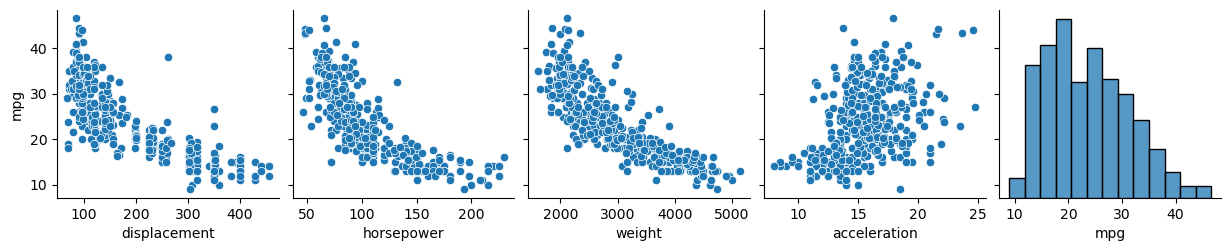

In [13]:
sns.pairplot(ds, x_vars=['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars=['mpg'])

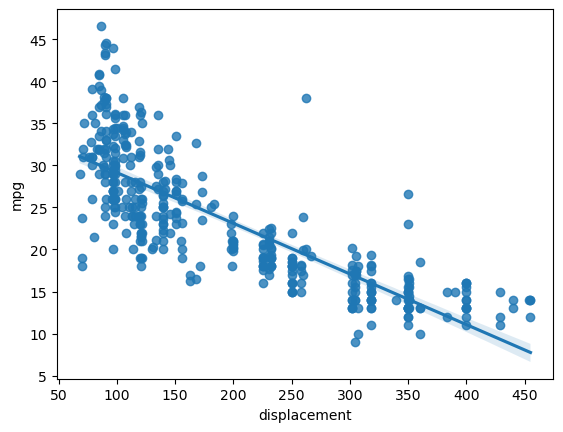

In [14]:
sns.regplot(x='displacement', y='mpg', data=ds);

<Axes: xlabel='acceleration', ylabel='mpg'>

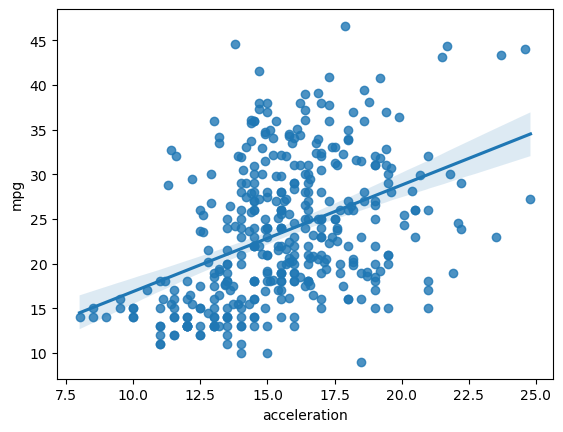

In [15]:
import warnings
warnings.filterwarnings('ignore')
sns.regplot(x='acceleration', y='mpg', data=ds)

<Axes: xlabel='model year', ylabel='mpg'>

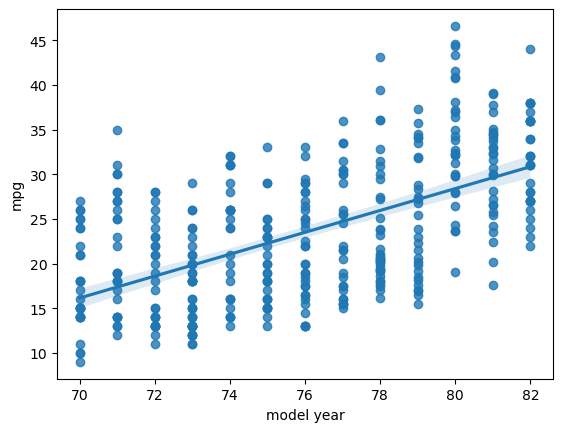

In [16]:
sns.regplot(x='model year', y='mpg', data=ds)

<Axes: xlabel='weight', ylabel='mpg'>

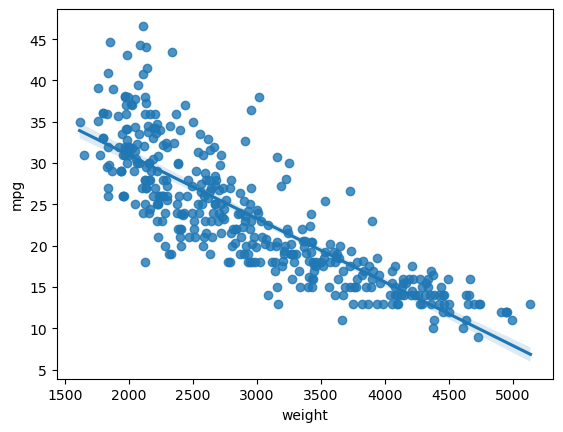

In [17]:
sns.regplot(x='weight', y='mpg', data=ds)

In [29]:
X = ds.drop(columns="car name")


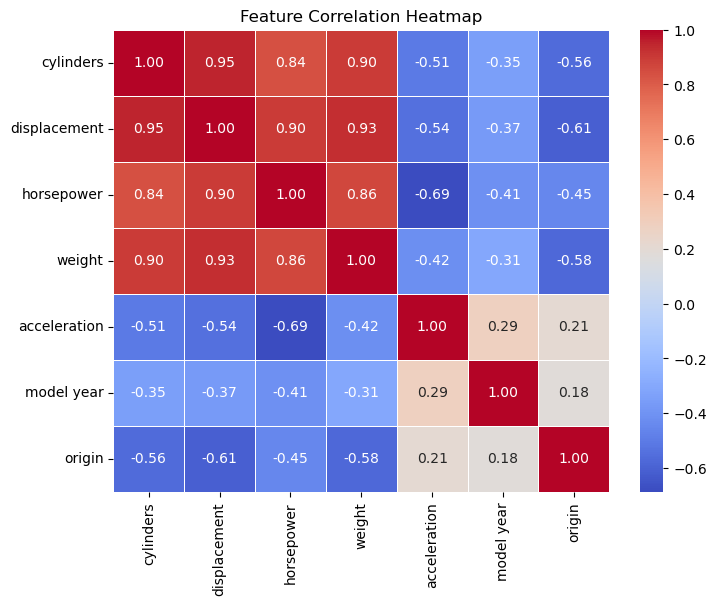

In [30]:
corr_matrix = x.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Above regplot show the reletion between two input data here we seen that most data has lienar rlration between so is good for as to predict the target 

In [31]:
ds.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [18]:
x=ds.iloc[:,1:-1]
x

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
394,4,97.0,52.0,2130,24.6,82,2
395,4,135.0,84.0,2295,11.6,82,1
396,4,120.0,79.0,2625,18.6,82,1


In [20]:
print(x)
# pd.REset_option('display.max_rows', None)

     cylinders  displacement  horsepower  weight  acceleration  model year  \
0            8         307.0       130.0    3504          12.0          70   
1            8         350.0       165.0    3693          11.5          70   
2            8         318.0       150.0    3436          11.0          70   
3            8         304.0       150.0    3433          12.0          70   
4            8         302.0       140.0    3449          10.5          70   
..         ...           ...         ...     ...           ...         ...   
393          4         140.0        86.0    2790          15.6          82   
394          4          97.0        52.0    2130          24.6          82   
395          4         135.0        84.0    2295          11.6          82   
396          4         120.0        79.0    2625          18.6          82   
397          4         119.0        82.0    2720          19.4          82   

     origin  
0         1  
1         1  
2         1  
3      

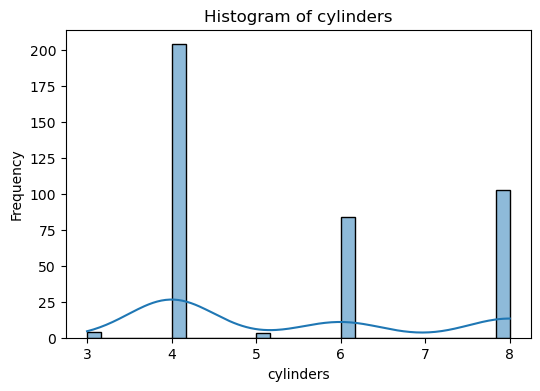

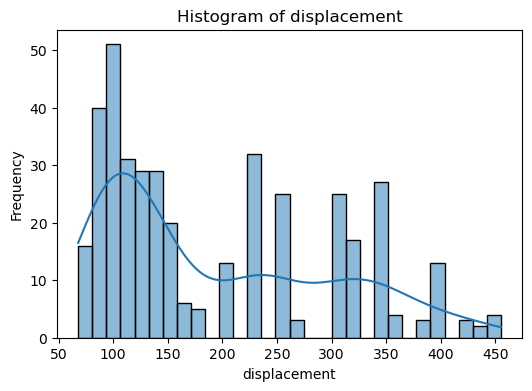

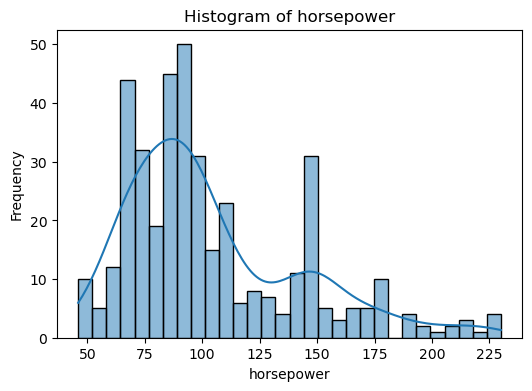

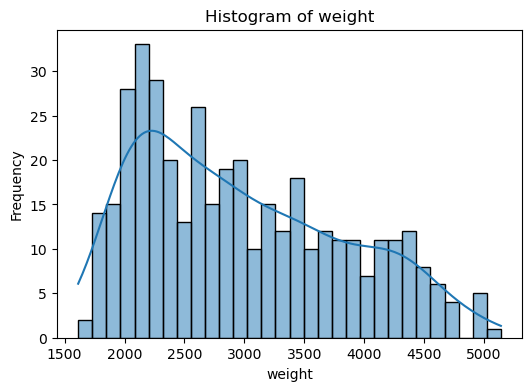

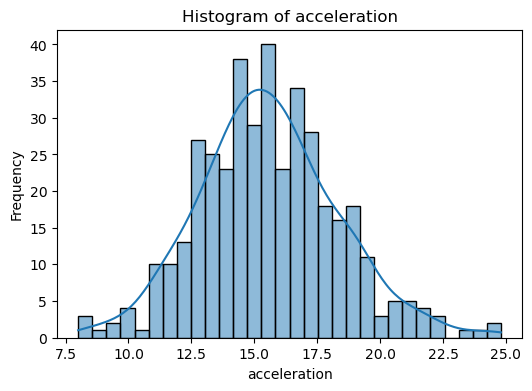

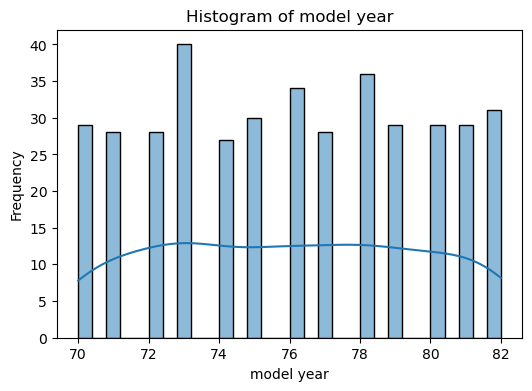

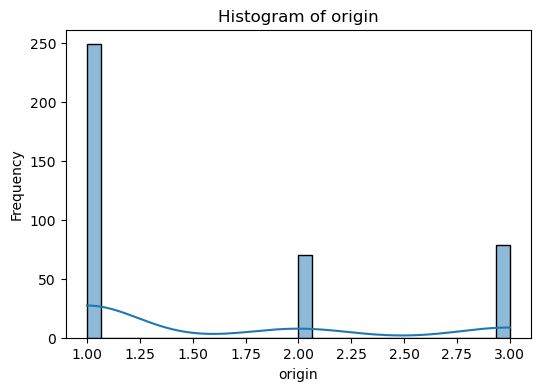

In [21]:
for col in x.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(x[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

histogram say that our data spraed is normal or abnormal distribution

In [32]:
y=ds['mpg']
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [112]:
from sklearn.model_selection import train_test_split
from sklearn .model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [113]:
scaler = StandardScaler()
X_nor = scaler.fit_transform(x)
# X_nor
X_nor_df = pd.DataFrame(X_nor, columns=x.columns)
X_nor_df

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145
...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,-0.715145
394,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.533222
395,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,-0.715145
396,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,-0.715145


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_nor_df, y, 
                                            test_size=0.2, random_state=42)

In [115]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
198,-0.856321,-0.983552,-1.343932,-1.389757,0.665128,-0.002721,1.781589
396,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,-0.715145
33,0.320935,0.370411,-0.112746,-0.397770,-0.932419,-1.356642,-0.715145
208,1.498191,1.196232,1.197027,1.146372,-0.859804,-0.002721,-0.715145
93,1.498191,1.196232,1.197027,1.497528,-0.387801,-0.815074,-0.715145
...,...,...,...,...,...,...,...
249,1.498191,0.639283,0.149209,0.466524,-0.024722,0.538847,-0.715145
225,0.320935,0.543257,0.149209,0.649787,0.302049,0.268063,-0.715145
367,-0.856321,-0.781898,-0.427091,-0.432058,1.463901,1.621983,-0.715145
175,-0.856321,-0.993154,-0.898609,-1.221864,-0.569341,-0.273506,0.533222


In [116]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=10, p=2)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [117]:
y_pred = knn_reg.predict(X_test)
y_pred

array([32.3 , 29.39, 18.7 , 15.99, 13.9 , 26.2 , 27.7 , 13.2 , 18.79,
       19.35, 13.9 , 35.88, 25.  , 14.5 , 23.35, 12.8 , 28.66, 20.82,
       14.5 , 36.5 , 26.3 , 18.5 , 23.5 , 30.42, 15.6 , 34.84, 25.9 ,
       26.04, 20.66, 13.  , 26.95, 34.97, 17.55, 25.  , 35.68, 13.  ,
       19.4 , 17.35, 15.1 , 26.  , 23.71, 28.3 , 23.2 , 12.2 , 23.9 ,
       35.25, 25.75, 22.51, 25.9 , 26.6 , 22.8 , 34.08, 34.39, 12.8 ,
       27.55, 12.8 , 17.11, 29.75, 24.1 , 19.  , 14.4 , 31.41, 23.81,
       22.2 , 18.6 , 23.9 , 25.45, 32.81, 28.13, 14.2 , 32.8 , 14.1 ,
       13.2 , 18.2 , 22.02, 18.64, 20.12, 28.56, 27.6 , 16.74])

In [118]:
y_test

198    33.0
396    28.0
33     19.0
208    13.0
93     14.0
       ... 
249    19.9
225    17.5
367    28.0
175    29.0
285    17.0
Name: mpg, Length: 80, dtype: float64

In [119]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error is :", mse)

Mean Squared Error is : 5.9066975


In [120]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error is :", rmse)

Root Mean Squared Error is : 2.430369827824564


In [121]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error is :", mae)

Mean Absolute Error is : 1.8552499999999998


In [122]:
accuracy = r2_score(y_test, y_pred)
print("Accuarcy of knn model is :", accuracy*100)

Accuarcy of knn model is : 89.01415625057032


Hyperparameter Tuning
Grid SearchCV

In [123]:
k = np.arange(2,25)
p = [1,2]
hyp = {'n_neighbors': k, "p":p}

In [124]:
knng = KNeighborsRegressor()
best_knn_model = GridSearchCV(knng,hyp,cv=5)
best_knn_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24]),
                         'p': [1, 2]})

In [125]:
best_knn_model.best_params_

{'n_neighbors': 8, 'p': 2}

In [126]:
y_pred1= knn_reg.predict(X_test)
y_pred1

array([32.3 , 29.39, 18.7 , 15.99, 13.9 , 26.2 , 27.7 , 13.2 , 18.79,
       19.35, 13.9 , 35.88, 25.  , 14.5 , 23.35, 12.8 , 28.66, 20.82,
       14.5 , 36.5 , 26.3 , 18.5 , 23.5 , 30.42, 15.6 , 34.84, 25.9 ,
       26.04, 20.66, 13.  , 26.95, 34.97, 17.55, 25.  , 35.68, 13.  ,
       19.4 , 17.35, 15.1 , 26.  , 23.71, 28.3 , 23.2 , 12.2 , 23.9 ,
       35.25, 25.75, 22.51, 25.9 , 26.6 , 22.8 , 34.08, 34.39, 12.8 ,
       27.55, 12.8 , 17.11, 29.75, 24.1 , 19.  , 14.4 , 31.41, 23.81,
       22.2 , 18.6 , 23.9 , 25.45, 32.81, 28.13, 14.2 , 32.8 , 14.1 ,
       13.2 , 18.2 , 22.02, 18.64, 20.12, 28.56, 27.6 , 16.74])

In [127]:
accuracy = r2_score(y_test, y_pred1)
print("Accuarcy of knn model is :", accuracy*100)

Accuarcy of knn model is : 89.01415625057032


Randomized Search CV

In [128]:
knn = KNeighborsRegressor()
best_knn_model = RandomizedSearchCV(knn,hyp,cv=5)
best_knn_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24]),
                                        'p': [1, 2]})

In [129]:
best_knn_model.best_params_

{'p': 1, 'n_neighbors': 6}

In [130]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                            test_size=0.2, random_state=42)

In [131]:
knn_reg1 = KNeighborsRegressor(n_neighbors=8, p=1)
knn_reg1.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8, p=1)

In [132]:
y_pred1 = knn_reg1.predict(X_test)
y_pred1

array([33.6125, 26.975 , 26.2   , 15.2125, 14.75  , 29.7125, 23.3625,
       12.625 , 14.8125, 21.9875, 15.15  , 33.5875, 30.575 , 16.0875,
       27.475 , 12.375 , 25.4125, 21.9   , 15.    , 33.3375, 27.2   ,
       21.45  , 20.65  , 30.3375, 17.7375, 34.15  , 26.9   , 26.525 ,
       20.4875, 12.875 , 23.675 , 34.0875, 15.8375, 25.4875, 33.5625,
       14.375 , 27.2875, 18.8125, 13.7375, 28.3875, 26.3375, 33.7625,
       24.275 , 13.25  , 27.45  , 30.5   , 27.2625, 26.475 , 26.775 ,
       30.85  , 26.6125, 32.5875, 28.175 , 14.    , 26.4625, 13.6875,
       14.625 , 26.5   , 25.7125, 19.3875, 16.75  , 33.6125, 27.725 ,
       24.1875, 22.2375, 27.825 , 22.6875, 31.85  , 29.85  , 15.125 ,
       31.725 , 14.875 , 14.625 , 21.75  , 23.0625, 20.075 , 19.15  ,
       25.975 , 31.0125, 15.8375])

In [133]:
accuracy = r2_score(y_test, y_pred1)
print("Accuarcy of knn model is :", accuracy)

Accuarcy of knn model is : 0.794548427975116
